In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [79]:
def select_edges_table(database_name, table_name, ParseDate):
    conn = sqlite3.connect(database_name)
    cur = conn.cursor()
    myresult = cur.execute('''SELECT News1,News2
                            FROM {0} WHERE ParseDate>=?'''.format(table_name, ), (ParseDate,))
    result = []
    for row in myresult:
        result.append(row)
    conn.close()        
    return result

In [80]:
edges = select_edges_table('./NewsNetwork_ch.db','CHTconnection','2020-06-27')
nodes=[]
for c in edges:
    if c[0] not in nodes:
        nodes.append(c[0])
    if c[1] not in nodes:
        nodes.append(c[1])

In [81]:
len(edges), len(nodes)

(1154, 885)

In [67]:
import matplotlib.pyplot as plt
import networkx as nx

/anaconda3/envs/spider/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/envs/spider/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


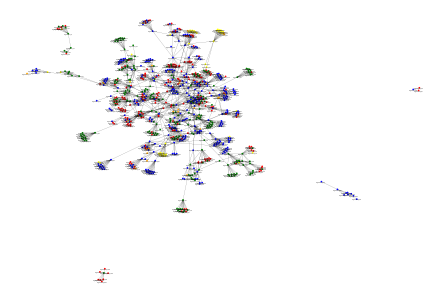

In [73]:
G = nx.Graph() 
G.add_edges_from(edges) 
G.add_nodes_from(nodes)
color_map = []
for n in G:
    if '0628' in n:
        color_map.append('blue')
    elif '0627' in n:
        color_map.append('green')
    elif '0626' in n:
        color_map.append('yellow')
    elif '0625' in n:
        color_map.append('orange')
    else:
        color_map.append('red')
nx.draw(G,
        pos = nx.spring_layout(G),
        node_color=color_map, 
        with_labels=True, 
        font_size=0.5, 
        node_size=0.5, 
        width=0.1)
# plt.show()
plt.savefig('./Networks.png', dpi=1200)